In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

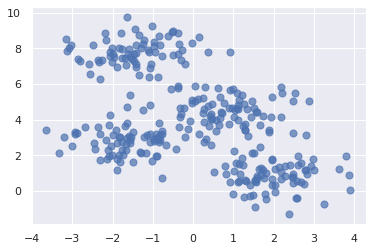

In [13]:
from sklearn.datasets import make_blobs

points, cluster_indexes = make_blobs(n_samples=300,
                                     centers=4,
                                     cluster_std=0.8,
                                     random_state=0)

x = points[:,0]
y = points[:,1]
plt.scatter(x, y, s=50, alpha=0.7)

Next, use the k-means clustering to divide the corrdinate pairs into four groups. Then render the cluster centroids in red and color code the data points by cluster. Scikit's KMeans class does the heavy lifting, and onve it's fit to the corrdinated pairs, you get the locations of the centroids from KMeans' cluster_center_attribute:

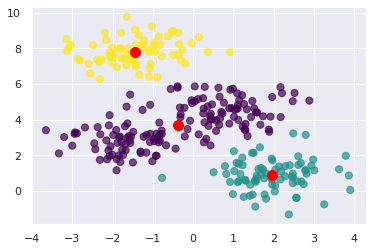

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100)

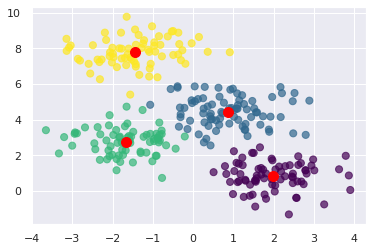

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100)

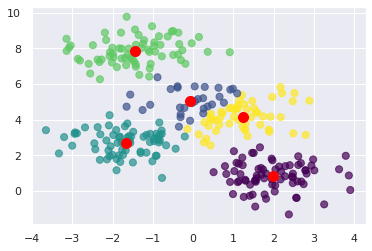

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100)

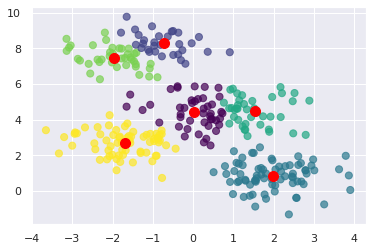

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100)

Text(0, 0.5, 'Inertia')

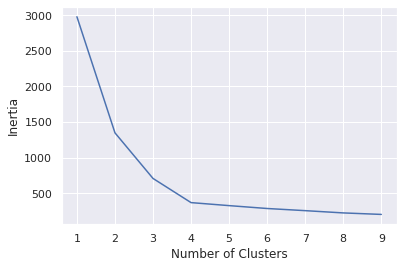

In [18]:
inertias = []

for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

In [19]:
import pandas as pd

customers = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%201/Data/customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

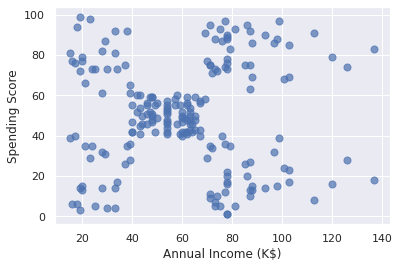

In [20]:
# Plot the annual income and spending scores
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

points = customers.iloc[:, 3:5].values
x = points[:,0]
y = points[:,1]

plt.scatter(x, y, s=50, alpha = 0.7)
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score")

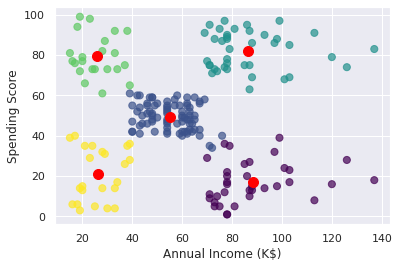

In [21]:
# Segment the customers into 5 clusters and highlight the clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c = predicted_cluster_indexes, s=50, alpha=0.7, cmap="viridis")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100)

The customers in the lower-right quadrant of the chart might be good ones to target with a promotion because of high incomes but low spending. The following statement will create a copu of the DataFrame and add a column names cluster containing cluster indexes.

In [22]:
df = customers.copy() 
df["Cluster"] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


Next, the following code to output the IDs od customers who have high income but low spending scores.

In [24]:
import numpy as np

#Get the cluster index for customers with high income and low spending
cluster = kmeans.predict(np.array([[120, 20]]))[0]

#Filter DataFrame to inlcude on customers in that cluster
clustered_df = df[df["Cluster"] == cluster]

#Show the customer IDs
clustered_df["CustomerID"].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

## Segmenting Customers Using More Than Two Dimensions

In [25]:
# Replace Strings "Male" and "Female" with a 1 or o
from sklearn.preprocessing import LabelEncoder

df = customers.copy() 
encoder = LabelEncoder() 
df["Gender"] = encoder.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Text(0, 0.5, 'Inertia')

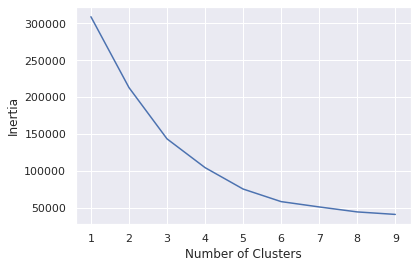

In [26]:
 #Extract gender, age, annual income, and speding and using elbow method to determine optimum number of clusters
 points = df.iloc[:, 1:5].values
 inertias = []

 for i in range(1, 10):
   kmeans = KMeans(n_clusters=i, random_state=0)
   kmeans.fit(points)
   inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

In [27]:
# Segment customers into five clusters and add a column names Cluster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

df["Cluster"] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [33]:
# Get the mean and average of each cluster
results = pd.DataFrame(columns=["Cluster", "Average Age", "Average Income", "Average Spending Index",
                                "Number of Females", "Number of Males"])

for i, center in enumerate(kmeans.cluster_centers_):
  age = center[1]
  income = center[2]
  spend = center[3]
  gdf = df[df["Cluster"] == i]
  females = gdf[gdf["Gender"] == 0].shape[0]
  males = gdf[gdf["Gender"] == 1].shape[0]

  results.loc[i] = ([i, age, income, spend, females, males])
  
results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0


## Using k_Nearest Neighbors to Classify Flowers

In [34]:
import pandas as pd
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["class"] = iris.target
df["class name"] = iris.target_names[iris["target"]]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [36]:
# Split Training and Testing Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [37]:
# Train the Model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
# See the model Score
model.score(x_test, y_test)

0.9666666666666667

In [39]:
# Identify species of an iris whose sepal length is 5.6 cm, sepal width 4.4 cm, petal length 1.2 cm, and pedal width 0.4 cm
model.predict([[5.6, 4.4, 1.2, 0.4]])

array([0])

In [40]:
# Train the Model (10 neighbors)
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
# See the model Score
model.score(x_test, y_test)

1.0

In [42]:
# Identify species of an iris whose sepal length is 5.6 cm, sepal width 4.4 cm, petal length 1.2 cm, and pedal width 0.4 cm
model.predict([[5.6, 4.4, 1.2, 0.4]])

array([0])